# Project Planning Stage (Individual)

## (1) Data Description:
- ### player.csv
    - The player.csv dataset contains information about each unique player that has played on the MineCraft server. With the record spanning 196 different players (observations), the dataset keeps track of 7 kinds of information (variables) of each player as seen in the following.

| **Information**    | **Information Type** | **Description**        | **Statistic Summary**    |
|--------------------|----------------------|------------------------|--------------------------|
| subscribe          | Logical              | whether a player is subscribed to the newsletter                | N/A                        |
| hashedEmail        | Character Vector     | the hasmail of the player                 | N/A                        |
| played_hours       | Double               | the amount of hours the player spent on the server                  | Mean: 20 Min: 0 Max: 223.1|
| name               | String               | name of the player                  | N/A                         |
| gender             | String               | gender of the player                  | N/A                        |
| Age                | Double               | age of the player                  |Mean: 20 Min: 8 Max: 50|

- In this dataset, there are some potential issues that are present in the data.
  1. There are 'N/A' values in some of the cells, indicating that we have to either skip over those cells or replace them with a different value
  2. The dataset underrepresents Non-binary people as they seems be in the minority in the gender category
  3. The dataset underrepresents people of higher ages as most of the players around around 18 - 21
- Additionally, some unseen factors may include things such as where the data was collected or the reasoning behind people inputting 'N/A' as an answer 

## (2) Questions:
- ### Broad Question
    - What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?
- ### Specific Question
    - Can the the age and played hours of players predict if they are going to subscribe to a game-related newsletter?
 
### Process with Given Data
I plan to utilized the provided data to predict whether if a player will subscribe or not to the newsletter. With only quantitative data being useful in this classification model, I would only require the subscribe, played_hours, and age columns. Hence I would wrangle the data so that it only contains those 3 columns by using the select() function.

## (3) Exploratory Data Analysis and Visualization:

In [1]:
#Required libraries
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Loading dataset into R
players_data <- read_csv("data/players.csv")
players_data |> head(10)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


In [3]:
# Minimum Wrangling on dataset
players_tidy <- players_data |>
    mutate(experience = as_factor(experience), gender = as_factor(gender))
players_tidy |> head(10)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


In [4]:
#Computing mean values for each quantitative variable
players_mean <- players_tidy |> 
    select(played_hours, Age) |> 
    map_dfr(mean, na.rm = TRUE)
players_mean

played_hours,Age
<dbl>,<dbl>
5.845918,20.52062


Warning message in geom_histogram(stat = "count"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”
Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


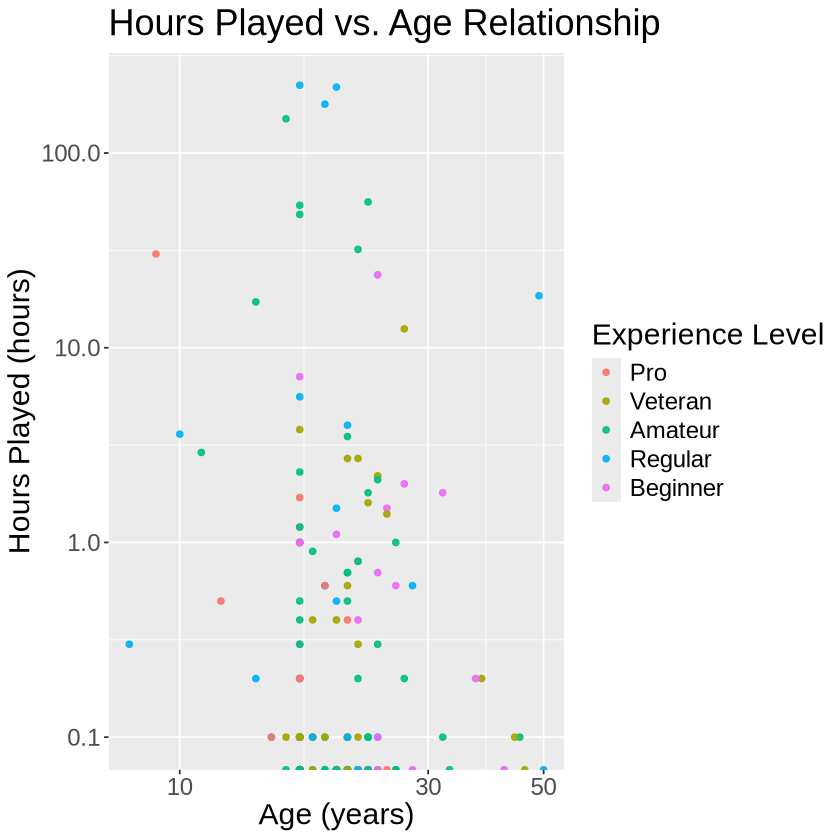

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


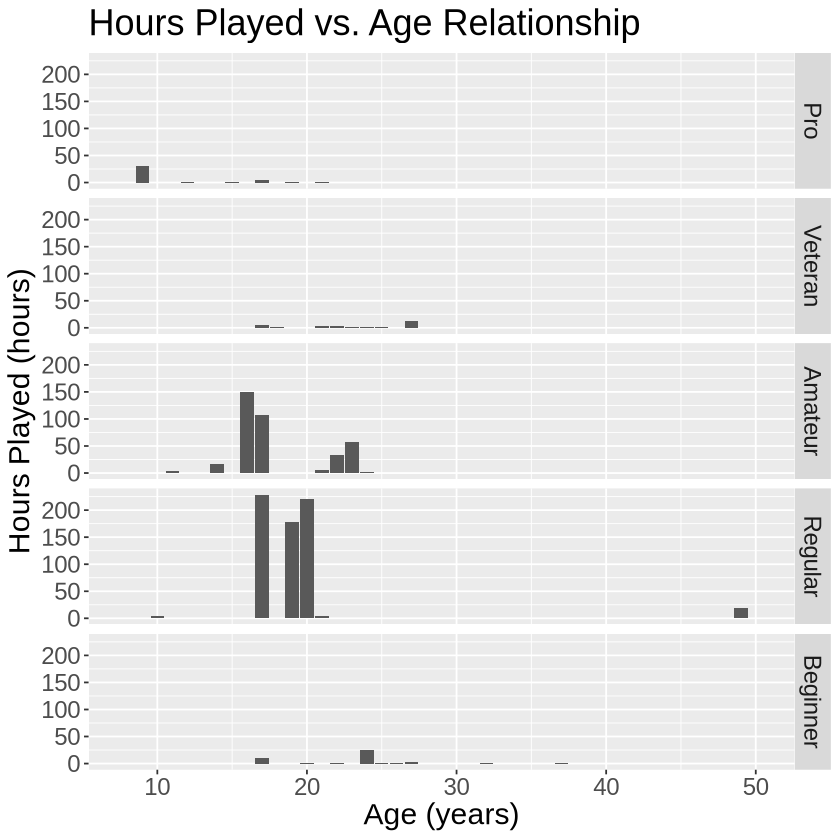

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


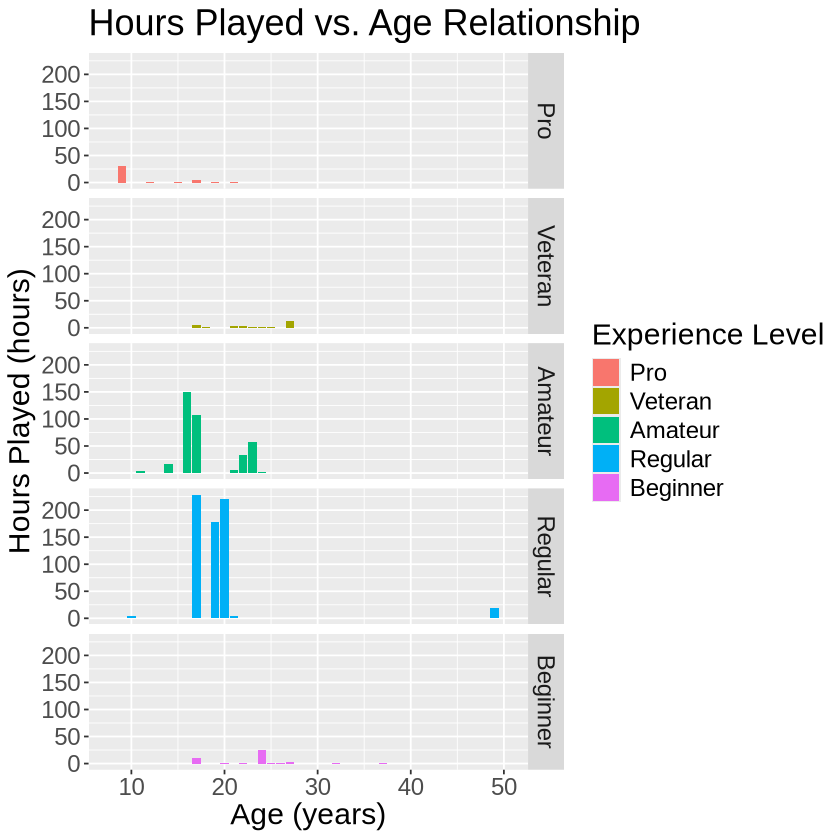

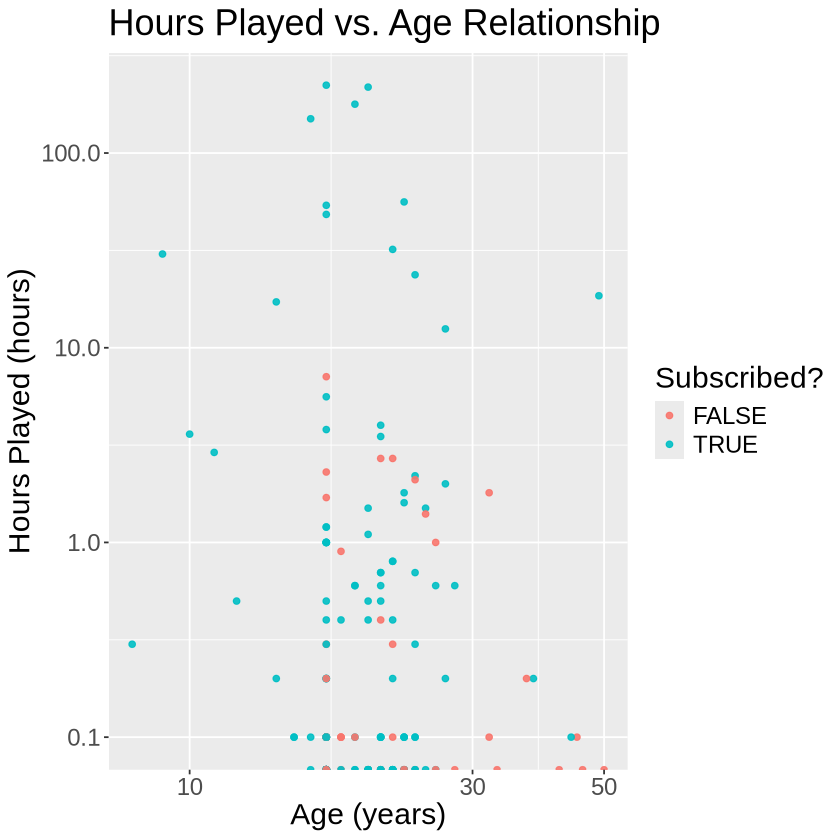

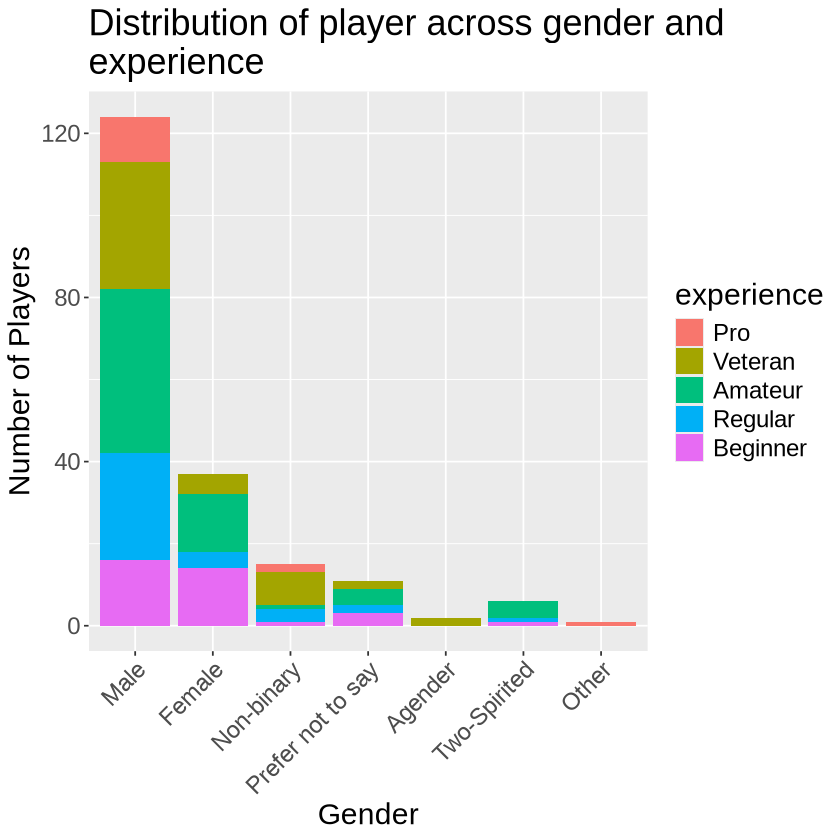

In [5]:
# Exploratory Visualizations
players_scatter <- players_tidy |>
    ggplot(aes(x = Age, y = played_hours, color = experience)) +
    geom_point(alpha = 0.9) + 
	scale_x_log10() +
    scale_y_log10() +
    labs(x = "Age (years)", y = "Hours Played (hours)", color = "Experience Level") +
    ggtitle("Hours Played vs. Age Relationship") +
    theme(text = element_text(size = 18))

players_scatter_sub <- players_tidy |>
    ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
    geom_point(alpha = 0.9) + 
	scale_x_log10() +
    scale_y_log10() +
    labs(x = "Age (years)", y = "Hours Played (hours)", color = "Subscribed?") +
    ggtitle("Hours Played vs. Age Relationship") +
    theme(text = element_text(size = 18))

players_bar_gender <- players_tidy |>
    ggplot(aes(x = Age, y = played_hours)) +
    geom_bar(stat = "identity") +
    labs(x = "Age (years)", y = "Hours Played (hours)") +
    ggtitle("Hours Played vs. Age Relationship") +
    theme(text = element_text(size = 18)) + facet_grid(rows = vars(experience))

players_bar_ex <- players_tidy |>
    ggplot(aes(x = Age, y = played_hours, fill = experience)) +
    geom_bar(stat = "identity") +
    labs(x = "Age (years)", y = "Hours Played (hours)", fill = "Experience Level") +
    ggtitle("Hours Played vs. Age Relationship") +
    theme(text = element_text(size = 18))+ facet_grid(rows = vars(experience))

players_bar_gender_better <- players_tidy |>
    ggplot(aes(x = gender, fill = experience)) +
    geom_histogram(stat = "count") +
    labs(x = "Gender", y = "Number of Players") +
    ggtitle("Distribution of player across gender and \nexperience") +
    theme(text = element_text(size = 18),
         axis.text.x = element_text(angle = 45, hjust = 1))

players_scatter
players_bar_gender
players_bar_ex
players_scatter_sub
players_bar_gender_better

- ### Insight
    - Players with the most experience spends the least amount of time on the server.
    - There seems to be an overrepresentation of Males in the gender category.
    - Gender does not seem to share a relationship with the amount of hours played.
    - Most of the players in the dataset are subscribed

## (4) Methods and Plan:

Method:
1. Wrangle dataset and filter out irrelavent variables. (such as hashmail)
2. Use vizualization techniques to understand the data and generally estimate what an answer might be like
3. Split the data into training and testing sets, 85/15 split
4. Fold the training data into 5 folds
5. Train, fit, and tune accuracy using k-nn binary classification model until the best K is found. K range should be frome 1-30
6. Use best k to retrain the k-nn classification model with training set
7. Assess accuracy and precision and make sure it it better than the majority classification model
8. Run the predictor through forward selection variable selection to find the most important predictors


To answer the broad and specific question, I utilize the K-Nearest-Nieghbor binary classification model to assess the problem. This mainly due to the fact that the prediction I am making is only has two state, if the new player is going subscribe or not. Hence, choosing this method of modeling a binary classification would be the most appropriate. However, before exacuting this, there are a couple of assumption I need to make. Firstly, the dataset used has no outliers as it might distort the prediction. And secondly, the dataset consist of a sufficient sample size to make a fairly accurate prediction. Nevertheless, some limitation of this model may include how it preforms poorly when there are too many predictors or when the classes are imbalance. However, I can try to maximize the accuracy and precision of the model by utilizing cross validation methods when training the classification model. Through this way, I can compare among the models with different K values and identify the best one that yields the highest accuracy and precision. 

Through my process, I will be splitting my dataset 6 times in total. Firstly, I would split the dataset into training set and testing sets right after the dataset is wrangled into a tidy fromat. Then when I need to tune the best K value, I would split the training set into 5 chunks to apply cross validation on it. The initial split will consist of a 85/15 split beteween the training set and the testing set. The other 5 splitted chunks from the training set would be an even proportion split, so it can use crass validation later.

In [ ]:
source("cleanup.R")